## Projection
Which states that if points in a vector space are of sufficiently high dimension, then they may be projected into a suitable lower-dimensional space in a way which approximately preserves the distances between the points.
> - The original d-dimensional data is projected to a k-dimensional (k << d) subspace $$ X_{k.N}=R_{k.d}.X_{d.N} $$
> - How to choose R: 
$$ m \ge \frac{8.log(k)}{ε^2} $$

## PCA:
$$ Input(X) \mapsto Generalization(X = U_kZ + \bar{U_k}Y) \mapsto Output(Z = U_k^TX) $$
- Loss function: (S: cov matrix, lambda is eigenvalue of S, u is eigenvector of S)
$$ L = \frac{1}{N}||\bar{U_k}\bar{U_k^T}X−\bar{U_k}\bar{U_k^T}\bar{x}1^T||_{2F}= \sum_{i=K+1}^D u_i^TSu_i = \sum_{i=K+1}^D \lambda_i $$
- Process: (r_K: ratio of remain information)
$$ X \mapsto \hat{X}=X-\mu \mapsto D(cov.matrix) \mapsto eigenvalues\&eigenvectors \mapsto Z = U_k^T\hat{X} $$
$$ r_K = \frac{\sum_{i=1}^K \lambda_i}{\sum_{j=1}^D \lambda_j} \quad \quad  $$

>- Remove the mean
- Compute the covariance matrix
- Find the eigenvalues and eigenvectors of the covariance matrix
- Sort the eigenvalues from largest to smallest
- Take the top N eigenvectors
- Transform the data into the new space created by the top N eigenvectors

### Resources:
> - [Tutorial](https://www.researchgate.net/publication/309019439_Principal_component_analysis_-_a_tutorial)
> - [machinelearningcoban](https://machinelearningcoban.com/2017/06/15/pca/)

### Appendix
> - Recontrucsion error.
> - Incremental PCA
> - Randomized PCA
> - Other Dimensionality Reduction Techniques

### Code

In [191]:
# Implement PCA process
#-----------------------------------------------------#

from numpy import *

def my_PCA(X, k=999999999):
    X_centered = X - X.mean(axis=0)
    cov_ma = cov(X_centered, rowvar=False) #Memoryerror
    eigen_vals, eigen_vecs = linalg.eig(cov_ma)
    ind_PCs = argsort(eigen_vals)
    ind_PCs = ind_PCs[:-(k+1):-1]
    projecter = eigen_vecs[:,ind_PCs]
    X_new = X_centered.dot(projecter)
    X_recons = X_new.dot(projecter.T) + X.mean(axis=0)
    return X_new, X_recons

### Practice

In [192]:
# Use sklearn to deal with eigenface problem
#-----------------------------------------------------#

import imageio
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# create matrix X
path = "http://vismod.media.mit.edu/vismod/classes/mas622-00/datasets/YALE/centered/"
ids = range(1, 16) # 15 persons
states = ['centerlight', 'glasses', 'happy', 'leftlight', 
          'noglasses', 'normal', 'rightlight','sad', 
          'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '.pgm'
m = len(states) * 15
n = 231 * 195
X = zeros((m, n))

row_num = 0
for id_num in ids:
    for state in states:
        link = path + prefix + str(id_num).zfill(2) + '.' + state + surfix
        X[row_num, :] = imageio.imread(link).flatten()
        row_num += 1

Text(0.5,0,'number component')

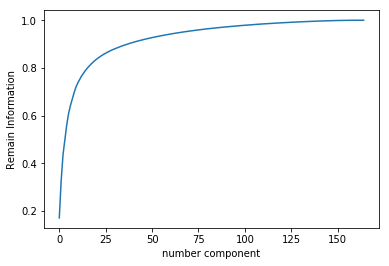

In [193]:
# Find k
#-----------------------------------------------------#

pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(165), cumsum)
plt.ylabel('Remain Information')
plt.xlabel('number component')

In [196]:
# ori_im vs new_im
#-----------------------------------------------------#

pca = PCA(n_components=50)
pca.fit(X)
U = pca.components_.T

x_or = X[0, :]
x_centered = x_or - pca.mean_
z = x_centered.dot(U)
x_re = z.dot(U.T) + pca.mean_

def show_image(X):
    f1 = plt.imshow(X.reshape((231, 195)))
    f1.axes.get_xaxis().set_visible(False)
    f1.axes.get_yaxis().set_visible(False)
    plt.gray()

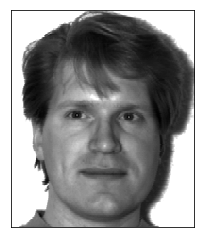

In [244]:
show_image(x_or)

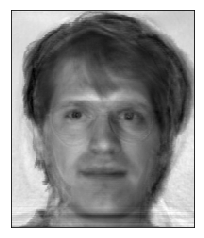

In [252]:
show_image(x_re)